In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler 

In [43]:
df = pd.read_csv('data.csv', index_col = 0)
df.sample(5)

,T1,F1,F2,F3,F4,F5,F6,T2,T3,F7,F8,F9,F10
164.0,2.678459,1914.079261,345.193227,122.104823,16.995303,368.651948,541.108660,76.506520,2521.113938,201.244076,0.0,10.873287,32.195470
461.0,3.150281,2018.730096,666.071055,95.431804,19.436391,243.658653,1013.463394,75.547226,2418.391967,327.004004,0.0,7.193412,17.934408
380.0,1.988732,2008.300311,866.596263,82.558627,26.647004,274.563206,342.540268,78.202731,2407.873386,235.171423,0.0,8.465672,50.636439
648.0,2.759415,1880.682199,1323.934038,72.181985,26.274309,319.716057,120.319022,71.780725,2699.851036,267.102907,1.0,7.694833,56.364749
783.0,2.450088,1915.062342,643.781000,82.177629,20.736276,269.025500,86.646495,66.882219,1250.392802,202.762807,1.0,2.638172,53.765568


In [44]:
X, y = df.drop(['T1'], axis = 1).values, df['T1'].values

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

In [45]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [46]:
normalizer.adapt(np.array(X))

In [47]:
print(normalizer.mean.numpy())

[[1.9757349e+03 7.3992310e+02 1.1057076e+02 2.2244389e+01 2.8588226e+02
  4.8273190e+02 7.3328568e+01 2.4669233e+03 2.1842317e+02 4.9169108e-01
  6.8992214e+00 5.7153934e+01]]


In [48]:
first = np.array(X[:1])

with np.printoptions(precision=2):
    print('Первый пример:', first)
    print()
    print('Нормализованный:', normalizer(first).numpy())

Первый пример: [[2030.    738.74   30.     22.27  100.    210.     70.   3000.    220.
     0.      4.     57.  ]]

Нормализованный: [[ 7.36e-01 -3.59e-03 -2.85e+00  9.76e-03 -4.54e+00 -9.70e-01 -1.07e+00
   1.10e+00  2.64e-02 -9.84e-01 -1.13e+00 -1.25e-02]]


In [49]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [50]:
linear_model.predict(X_train[:13])

array([[ 1.1727617 ],
       [ 0.93901396],
       [-1.1917777 ],
       [ 1.732645  ],
       [ 2.179224  ],
       [ 3.2372465 ],
       [-0.0274466 ],
       [-1.107422  ],
       [-0.08693177],
       [-0.50711316],
       [-2.2898824 ],
       [-1.160274  ],
       [ 2.0988932 ]], dtype=float32)

In [51]:
y_train[:13]

array([3.99659238, 1.91684277, 2.62994592, 1.70409738, 2.54353934,
       1.82710467, 2.76291574, 3.10455926, 3.11263937, 2.65635732,
       4.54306502, 3.86403486, 3.80019788])

In [52]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [53]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 7ms/step - loss: 2.2926 - val_loss: 1.4349
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.9716 - val_loss: 0.7991
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7896 - val_loss: 0.7359
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.7604 - val_loss: 0.7901
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7666 - val_loss: 0.7543
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7446 - val_loss: 0.7813
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7601 - val_loss: 0.8004
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7820 - val_loss: 0.7591
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7519 - val_loss: 0.8023
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7670 - val_loss: 0.7883
Epoch 11/

17/17 [==============================] - 0s 3ms/step - loss: 0.7439 - val_loss: 0.7401
Epoch 84/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7503 - val_loss: 0.8105
Epoch 85/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7719 - val_loss: 0.7379
Epoch 86/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7619 - val_loss: 0.8082
Epoch 87/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7434 - val_loss: 0.7647
Epoch 88/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7544 - val_loss: 0.7433
Epoch 89/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7555 - val_loss: 0.7430
Epoch 90/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7444 - val_loss: 0.7730
Epoch 91/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7609 - val_loss: 0.7790
Epoch 92/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7679 - val_loss: 0.7563
Epoch 93/100


In [55]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [MPG]')
    plt.legend()
    plt.grid(True)

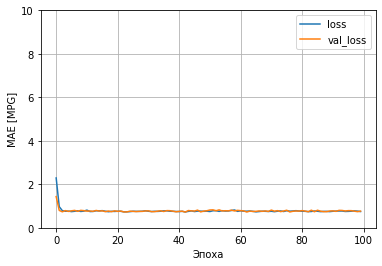

In [56]:
plot_loss(history)

In [58]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(X_test, y_test, verbose=0)

In [59]:
test_results

{'linear_model': 0.7908944487571716}

In [60]:
tf.linspace(0.0, 250, 251)

<tf.Tensor: shape=(251,), dtype=float32, numpy=
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
   

In [61]:
x = tf.linspace(0.0, 250, 251)
prediction = linear_model.predict(x)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_4/normalization_1/sub' defined at (most recent call last):
    File "C:\Users\nat_n\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\nat_n\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\nat_n\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\nat_n\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\nat_n\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\nat_n\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\nat_n\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\nat_n\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\nat_n\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\nat_n\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\nat_n\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\nat_n\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\nat_n\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\nat_n\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\nat_n\AppData\Local\Temp/ipykernel_22188/730996649.py", line 2, in <module>
      prediction = linear_model.predict(x)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\training.py", line 1982, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function
      return step_function(self, iterator)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
      return self(x, training=False)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\layers\preprocessing\normalization.py", line 305, in call
      return ((inputs - self.mean) /
Node: 'sequential_4/normalization_1/sub'
Incompatible shapes: [32] vs. [1,12]
	 [[{{node sequential_4/normalization_1/sub}}]] [Op:__inference_predict_function_18263]

In [28]:
model = Sequential([
    Dense(12, activation='relu', input_dim=6),
    Dense(12, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation='softmax'),
])

model.compile(optimizer='adam', 
              #loss='binary_crossentropy',  # только для задач классификации
              metrics=['accuracy', 'mse', 'mae'])  # только для задач классификации

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                84        
                                                                 
 dense_9 (Dense)             (None, 12)                156       
                                                                 
 dense_10 (Dense)            (None, 6)                 78        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\nat_n\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 6), found shape=(None, 12)
